Current Loan Details:
Monthly Payment: $1,073.64
Total Interest Paid: $186,511.57

Refinanced Loan Details:
Monthly Payment: $954.83
Total Interest Paid: $143,739.01
Refinancing Costs: $5,000.00

Refinancing Analysis:
Monthly Savings: $118.81
Break-Even Point: 43 months


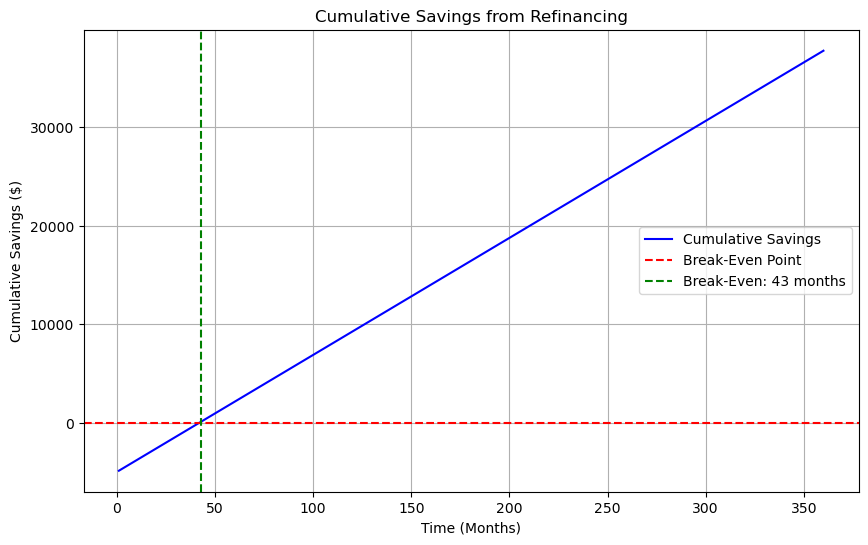

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Current loan parameters
current_principal = 200000  # Remaining principal
current_rate = 0.05 / 12  # Current monthly interest rate (5% annual)
current_term = 30 * 12  # Remaining loan term in months

# Refinanced loan parameters
refinance_rate = 0.04 / 12  # New monthly interest rate (4% annual)
refinance_term = 30 * 12  # New loan term in months
refinance_cost = 5000  # Refinancing costs (e.g., closing costs)

# Function to calculate loan details
def calculate_loan(principal, rate, term):
    # Calculate monthly payment
    monthly_payment = (rate * principal) / (1 - (1 + rate)**(-term))
    # Generate amortization schedule
    balance = np.zeros(term + 1)
    balance[0] = principal
    interest_paid = np.zeros(term)
    for month in range(term):
        interest = rate * balance[month]
        principal_payment = monthly_payment - interest
        balance[month + 1] = balance[month] - principal_payment
        interest_paid[month] = interest
    total_interest = np.sum(interest_paid)
    return monthly_payment, total_interest, balance

# Calculate current loan details
current_payment, current_interest, current_balance = calculate_loan(current_principal, current_rate, current_term)

# Calculate refinanced loan details
refinance_payment, refinance_interest, refinance_balance = calculate_loan(current_principal, refinance_rate, refinance_term)

# Calculate monthly savings and cumulative savings
monthly_savings = current_payment - refinance_payment
cumulative_savings = np.cumsum(np.full(current_term, monthly_savings)) - refinance_cost

# Calculate break-even point
break_even_months = np.argmax(cumulative_savings >= 0) + 1  # Month when cumulative savings become positive

# Print results
print("Current Loan Details:")
print(f"Monthly Payment: ${current_payment:,.2f}")
print(f"Total Interest Paid: ${current_interest:,.2f}")

print("\nRefinanced Loan Details:")
print(f"Monthly Payment: ${refinance_payment:,.2f}")
print(f"Total Interest Paid: ${refinance_interest:,.2f}")
print(f"Refinancing Costs: ${refinance_cost:,.2f}")

print("\nRefinancing Analysis:")
print(f"Monthly Savings: ${monthly_savings:,.2f}")
print(f"Break-Even Point: {break_even_months} months")

# Plot cumulative savings and break-even point
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, current_term + 1), cumulative_savings, label="Cumulative Savings", color="blue")
plt.axhline(0, color="red", linestyle="--", label="Break-Even Point")
plt.axvline(break_even_months, color="green", linestyle="--", label=f"Break-Even: {break_even_months} months")
plt.xlabel("Time (Months)")
plt.ylabel("Cumulative Savings ($)")
plt.title("Cumulative Savings from Refinancing")
plt.grid()
plt.legend()
plt.show()